In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('winequality-red.csv')

C:\Users\yasha\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
# 1.data
  2. eda
  3. preproccesing
  4. model - svm = 2d - 3d
           svc

  5. evalution - performnace matrix, confusion matrix, auc/roc curve


In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
# checking for null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

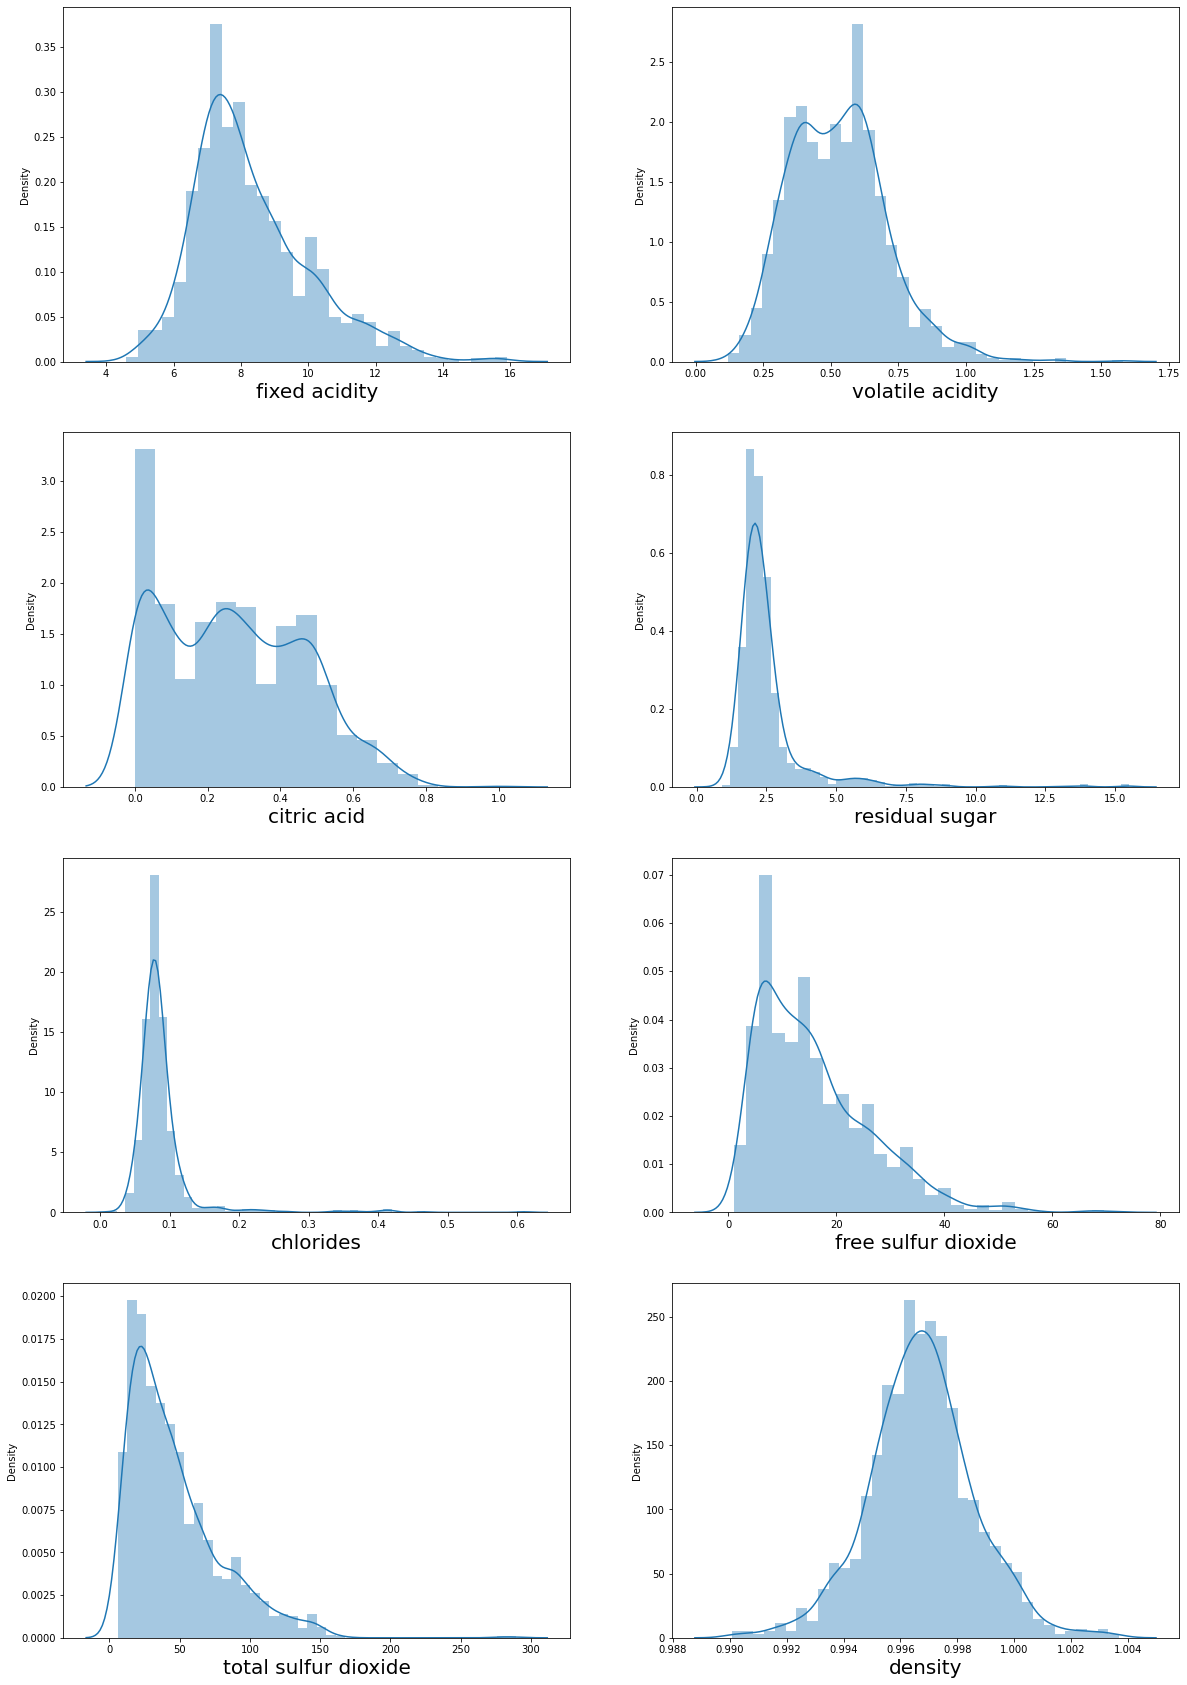

In [10]:
# lets see how data is distributed in each coloumn

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for coloumn in df :
    if plotnumber<=8 :
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(df[coloumn])
        plt.xlabel(coloumn,fontsize=20)
            
    plotnumber+=1
plt.show()    

<AxesSubplot:>

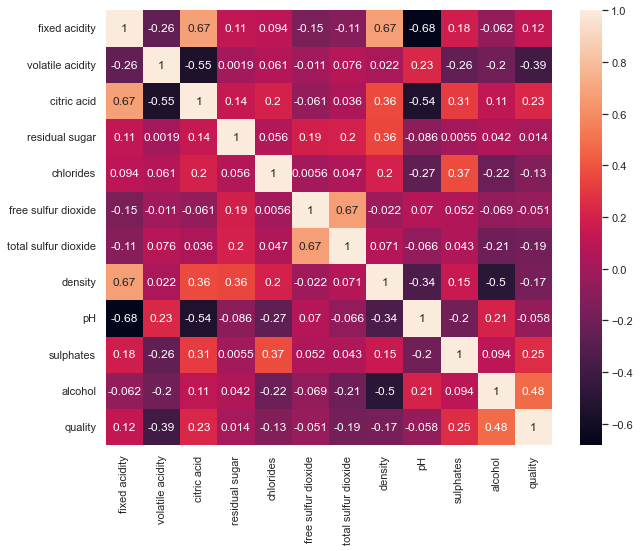

In [11]:
# see the graph in heatmap

sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df.corr(),annot=True)

## dividing the dataset as independent and dependent variable

In [12]:
x = df.drop('quality', axis = 1)

In [13]:
x.shape

(1599, 11)

In [14]:
y = df['quality']

In [15]:
y.shape

(1599,)

In [16]:
# divideing the dataset as test and train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4
355,6.7,0.750,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
209,11.0,0.300,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6


In [18]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [19]:
x_test.shape

(528, 11)

In [20]:
x_train.shape

(1071, 11)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(x_train) #calclaute the mean and std dev

StandardScaler()

In [24]:
print(scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [25]:
x_train_tf = scaler.transform(x_train)

In [26]:
x_train_tf

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

In [27]:
scaler.fit_transform(x_train)

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

In [28]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)

In [29]:
model.fit(x_train_tf,y_train)

SVC(kernel='linear', random_state=0)

In [30]:
model.score(x_train_tf,y_train)

0.6013071895424836

In [31]:
x_test_tf = scaler.transform(x_test)

In [32]:
y_predict = model.predict(x_test_tf)

In [33]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  13,   6,   0,   0],
       [  0,   0, 166,  51,   0,   0],
       [  0,   0,  84, 129,   0,   0],
       [  0,   0,   5,  65,   0,   0],
       [  0,   0,   0,   7,   0,   0]], dtype=int64)

In [34]:
#finding Accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_predict)

accuracy

0.5587121212121212

In [35]:
# importing logstic regression

from sklearn.linear_model import LogisticRegression

In [36]:
model2 = LogisticRegression()

In [37]:
model2.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_predict2 = model2.predict(x_test_tf)

In [39]:
accuracy_score(y_test,y_predict2)

0.3939393939393939

In [40]:
#gridsearch cv

# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [41]:
accuracy = grid_search.best_score_

In [42]:
accuracy

0.603227760470751

In [43]:
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}